Q 01 == Multi Linear Regression 50 Startsup

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
# import datasets
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/DS Data Sets/Multi Linear Regression/50_Startups.csv')


In [8]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [15]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [21]:
df[df.values == 0.0]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


<Axes: >

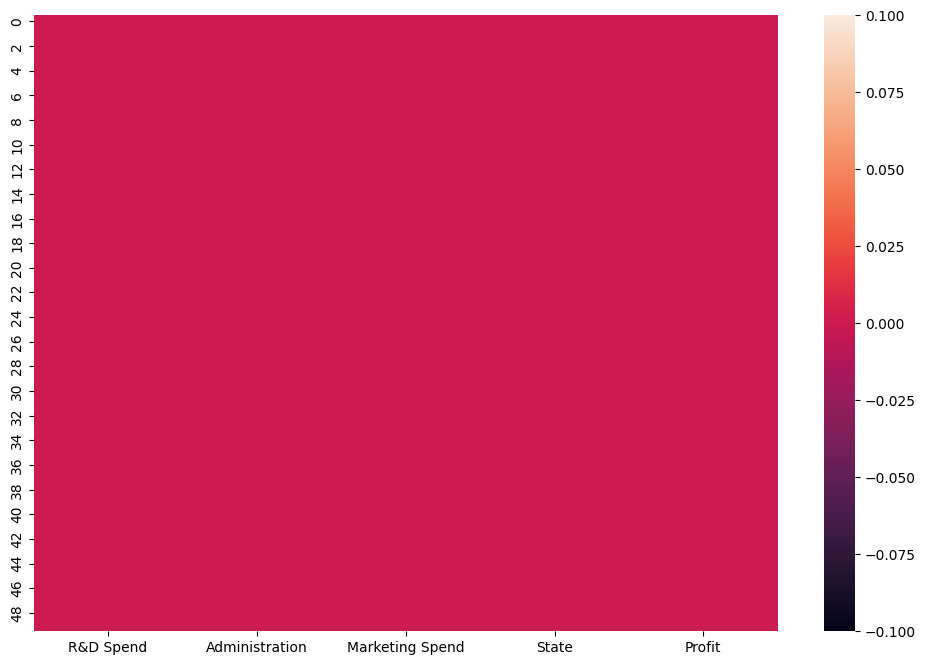

In [25]:
# visualising missing values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [26]:
# no missing values in the data set

In [28]:
# checking duplicated values
df[df.duplicated()].shape

(0, 5)

In [30]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [32]:
df[df.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [33]:
# no duplicated values in the data set

In [34]:
#corelation analysis
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


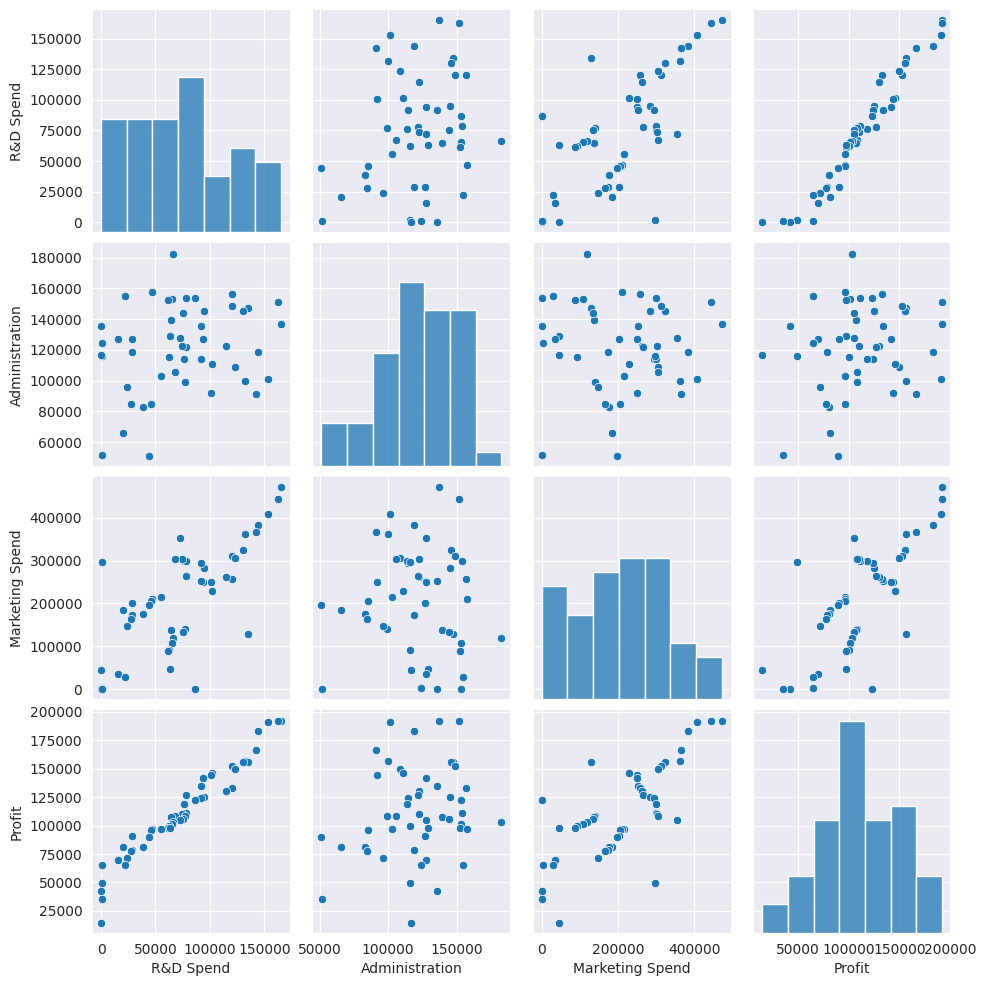

In [36]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [56]:
df.rename(columns={'Administration': 'admin'}, inplace=True)

In [53]:
df.rename(columns={'R&D Spend': 'rnd'}, inplace=True)


In [54]:
df.rename(columns={'Marketing Spend': 'mkt'}, inplace=True)

In [57]:
df.head()

,rnd,admin,mkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [61]:
model = smf.ols("Profit~rnd+admin+mkt",data=df).fit()

In [64]:
# model testing
# finding coefficient parameters
model.params

Intercept    50122.192990
rnd              0.805715
admin           -0.026816
mkt              0.027228
dtype: float64

In [66]:
# finding tvalues and pvalues
model.tvalues, np.round(model.pvalues,5)

(Intercept     7.626218
 rnd          17.846374
 admin        -0.525507
 mkt           1.655077
 dtype: float64,
 Intercept    0.00000
 rnd          0.00000
 admin        0.60176
 mkt          0.10472
 dtype: float64)

In [68]:
# finding rsquared values
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [69]:
# SLR and MLR models for admin and mkt

In [71]:
slr_a=smf.ols("Profit~admin", data=df).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept    3.040044
 admin        1.419493
 dtype: float64,
 Intercept    0.003824
 admin        0.162217
 dtype: float64)

In [73]:
slr_m=smf.ols("Profit~mkt", data=df).fit()
slr_m.tvalues, slr_m.pvalues

(Intercept    7.808356
 mkt          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 mkt          4.381073e-10
 dtype: float64)

In [75]:
# admin has insignificant pvalue.
# mkthas significant pvalue

In [78]:
mlr_am=smf.ols("Profit~admin+mkt", data=df).fit()
mlr_am.tvalues, mlr_am.pvalues

(Intercept    1.142741
 admin        2.467779
 mkt          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 admin        1.729198e-02
 mkt          9.727245e-11
 dtype: float64)

In [79]:
# Variables have significant pvalues

In [80]:
# Model Validation

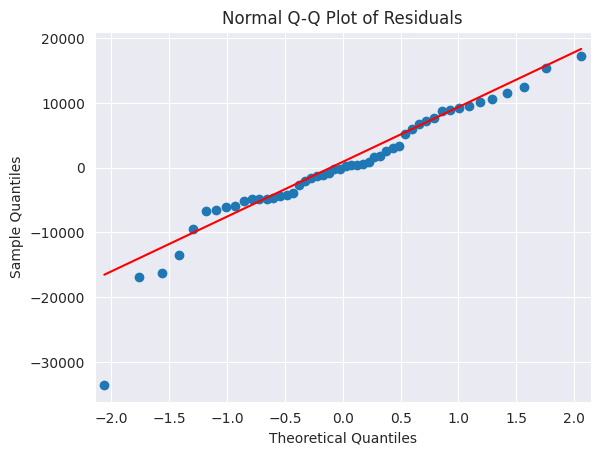

In [82]:
# Residual Analysis
# normality of residuals using using residual model
sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [84]:
list(np.where(model.resid<-30000))

[array([49])]

In [86]:
# test for Homoscedasticity or Heteroscedasticity
def standard_values(vals) : return (vals-vals.mean())/vals.std()

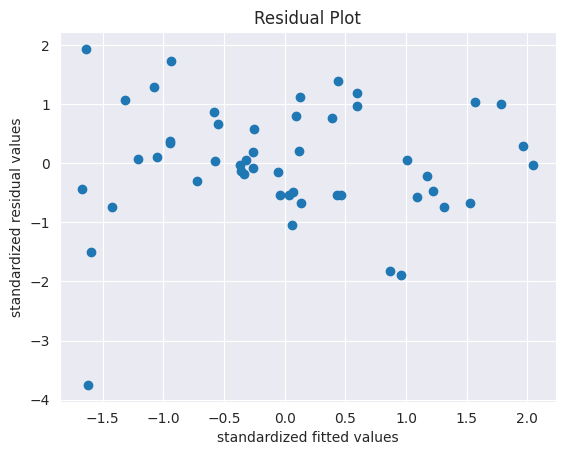

In [92]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [93]:
 # Test for errors


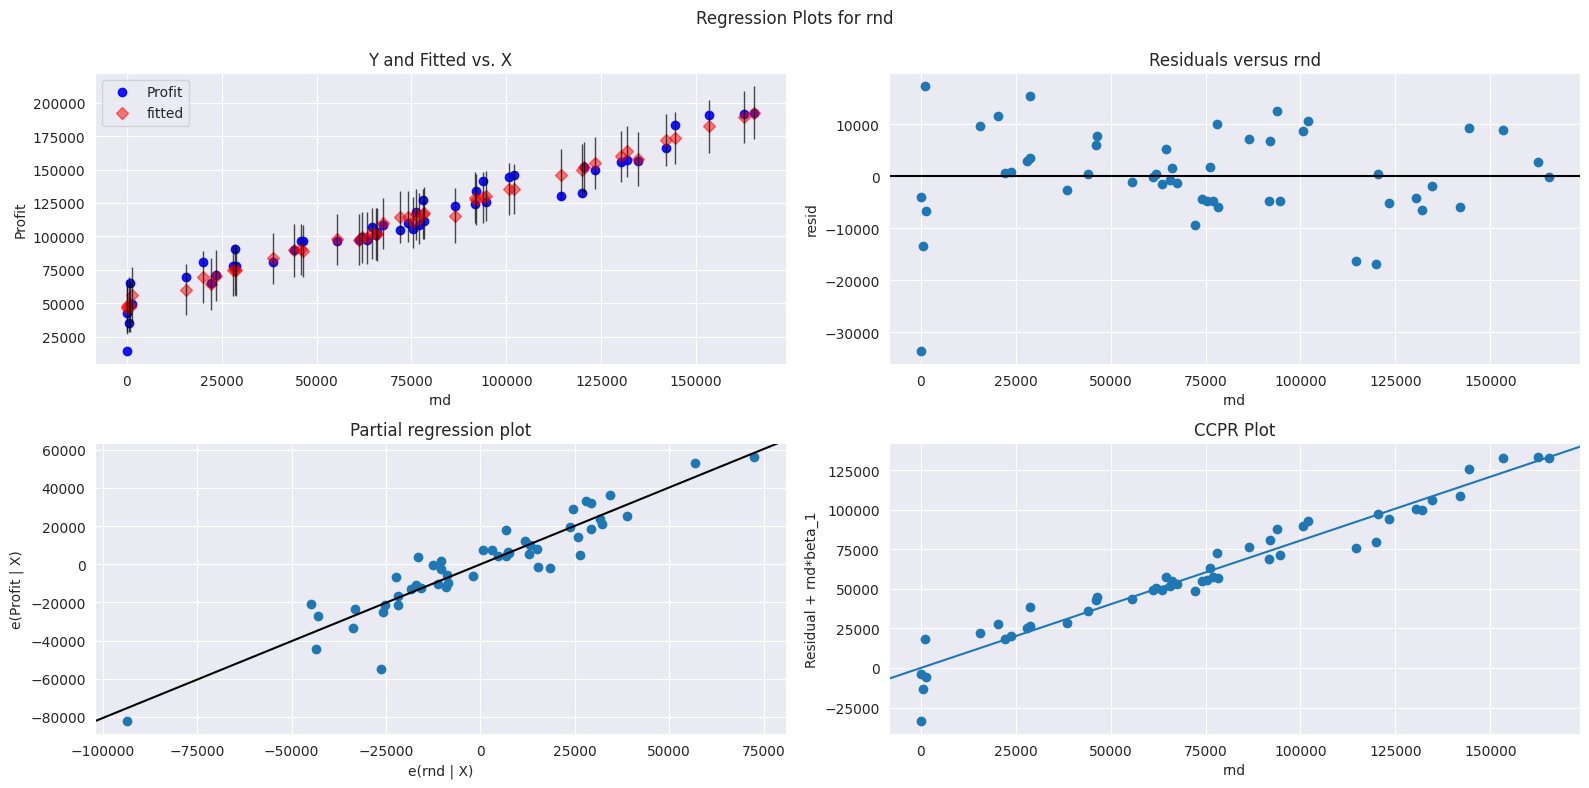

In [95]:
fig=plt.figure(figsize=(16,8))
sm.graphics.plot_regress_exog(model, 'rnd', fig=fig)
plt.show()

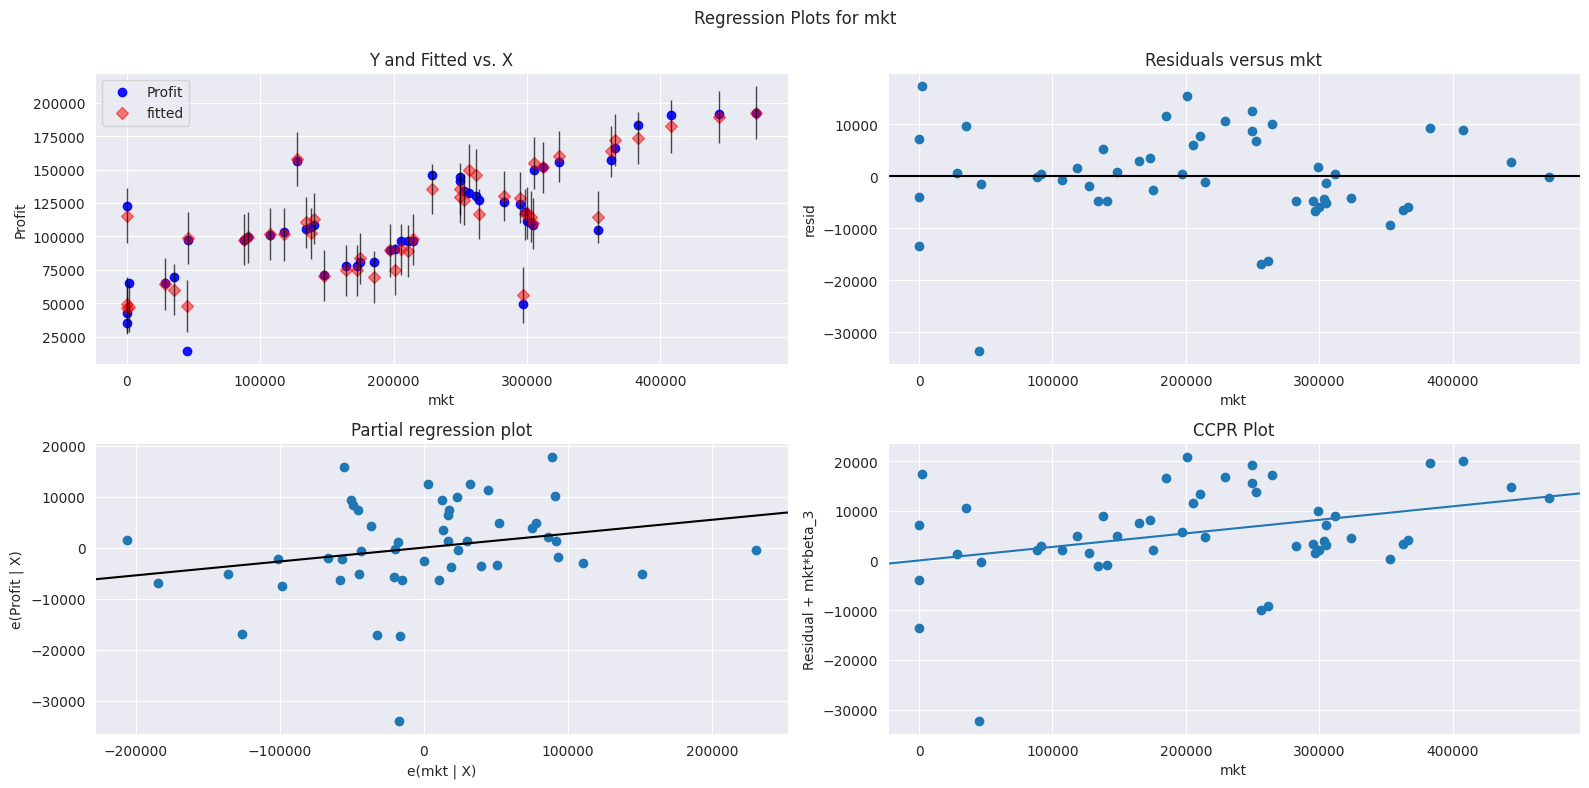

In [98]:
fig = plt.figure(figsize=(16,8))
sm.graphics.plot_regress_exog(model,'mkt', fig=fig)
plt.show()

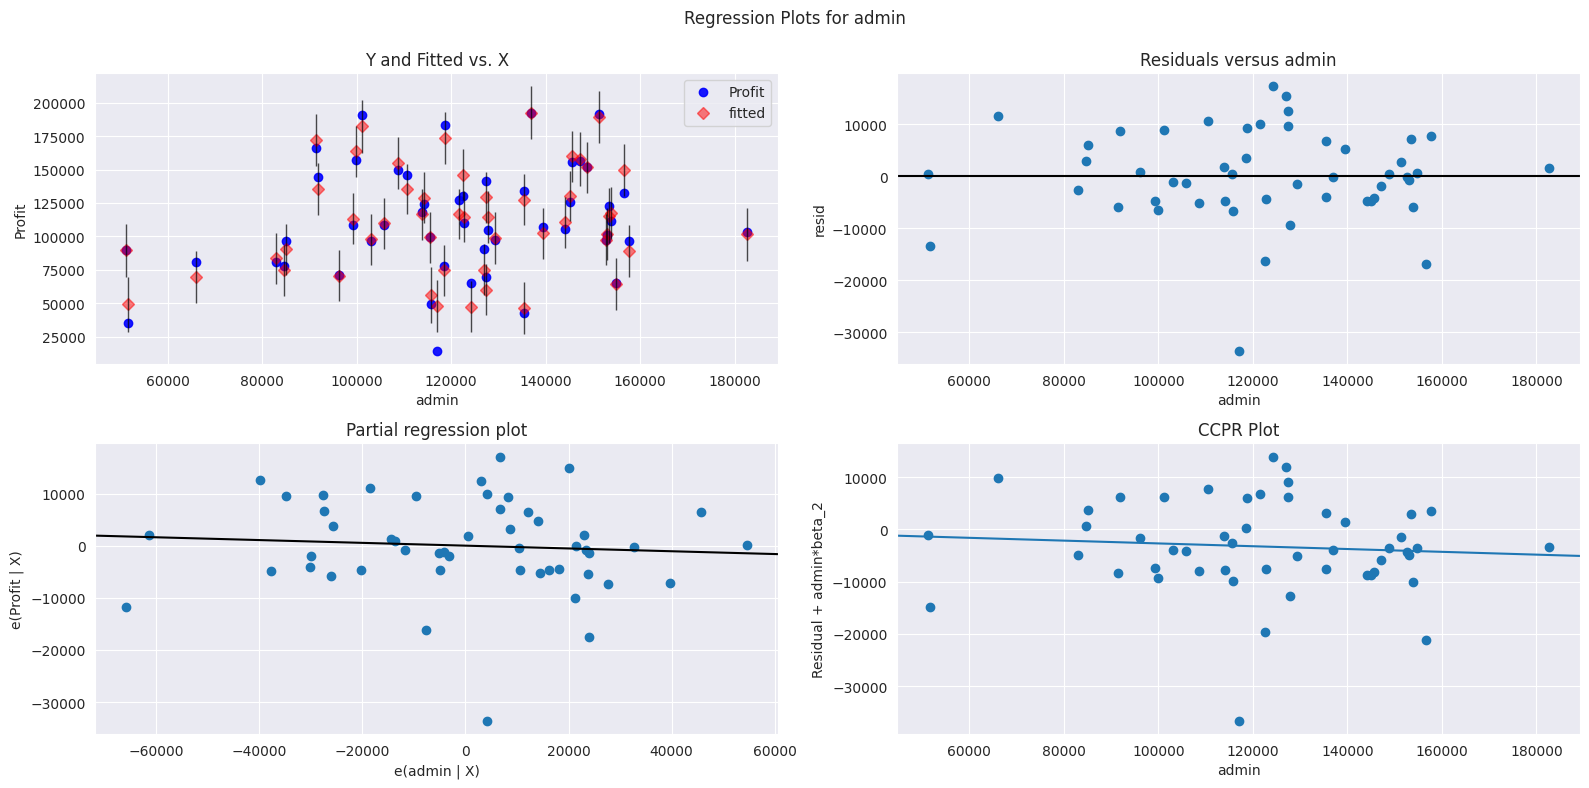

In [100]:
fig= plt.figure(figsize=(16,8))
sm.graphics.plot_regress_exog(model,'admin', fig=fig)
plt.show()

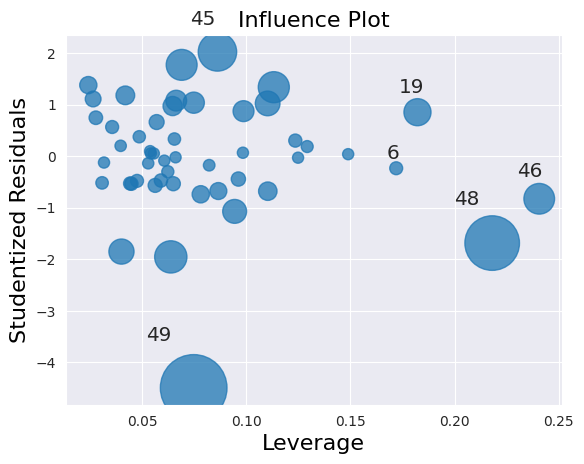

In [102]:
# checking outliers or influencers
influence_plot(model)
plt.show()


In [105]:
# leverage cutoff value = 3*(k+1)/n
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1)/n)
leverage_cutoff

0.36

In [107]:
df[df.index.isin([49])]

,rnd,admin,mkt,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [109]:
# improving the model
# discard data points which are influencers and reasign the row number

In [111]:
df1= df.drop(df.index[[49]], axis=0).reset_index(drop=True)
df1

,rnd,admin,mkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [115]:
# model predictions
new_df= pd.DataFrame({'rnd':70000,'admin':90000,'mkt': 140000},index=[0])
new_df

,rnd,admin,mkt
0,70000,90000,140000
